<div style="text-align: center;">
    <h1 style="font-size: 64px; 
               font-weight: 800;
               color: #1f0d4f;
               letter-spacing: 2px;
               margin: 40px 0;">
        LISTA 1
    </h1>
</div>

### Importy


In [1]:
import pandas as pd
import random
import time
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 1 - Obliczanie wartości wielomianu

<div style="background-color: #f9fafb; border-left: 4px solid #6b7280; padding: 15px; margin: 20px 0;">
    <p><strong>Zadanie:</strong> Dla wielomianu stopnia $n$:</p>
    $$p(x) = \sum_{i=0}^{n} a_i x^i$$
    <p>Zaimplementuj i porównaj trzy algorytmy obliczania jego wartości w punkcie.</p>
</div>

<div style="background-color: #f0f7ff; border-left: 4px solid #2563eb; padding: 15px; margin: 20px 0;">
<h3 style="margin-top: 0; color: #1e40af;">Algorytm naiwny</h3>
<p><strong>Idea:</strong> Dla każdego składnika $a_{i}x^i$ obliczamy $x^i$ poprzez $i$ mnożeń.</p>
<p><strong>Złożoność czasowa:</strong> $\mathcal{O}(n^2)$, bo suma $ \sum\limits_{i=0}^{n} i = \frac{n(n+1)}{2} $</p>
<p><strong>Złożoność pamięciowa:</strong> $\mathcal{O}(1)$</p>
</div>

In [2]:
# coefficients [5, 2, 1] <=> x^2+2x+5
def polynomial_naive(coefficients, x):
    n = len(coefficients) - 1
    result = 0

    for i in range(n+1):
        power = 1
        for j in range(i):
            power *= x
        result += coefficients[i] * power
    return result

<div style="background-color: #f0f7ff; border-left: 4px solid #2563eb; padding: 15px; margin: 20px 0;">
<h3 style="margin-top: 0; color: #1e40af;">Algorytm z szybkim potęgowaniem</h3>
<p><strong>Idea:</strong> Wykorzystujemy algorytm szybkiego potęgowania do obliczenia $x^i$</p>
<p><strong>Złożoność czasowa:</strong> $\mathcal{O}(n \log n)$, bo dla każdego z $n+1$ składników obliczamy $x^i$ w czasie $\mathcal{O}(\log i)$</p>
<p><strong>Złożoność pamięciowa:</strong> $\mathcal{O}(1)$</p>
</div>

In [3]:
def fast_power(base, exp):
    if exp == 0:
        return 1
    
    result = 1
    while exp > 0:
        if exp % 2 == 1:
            result *= base
        base *= base
        exp //= 2
    
    return result

def polynomial_fast_power(coefficients, x):
    n = len(coefficients) - 1
    result = 0
    
    for i in range(n + 1):
        result += coefficients[i] * fast_power(x, i)
    
    return result

<div style="background-color: #f0f7ff; border-left: 4px solid #2563eb; padding: 15px; margin: 20px 0;">
<h3 style="margin-top: 0; color: #1e40af;">Schemat Hornera</h3>
<p><strong>Idea:</strong> Przekształcamy wielomian do postaci zagnieżdżonej:
$$ p(x) = a_{0} + x(a_{1} + x(a_{2} + x(a_{3} + ... + x(a_{n-1} + x(a_{n})...))) $$</p>
<p><strong>Złożoność czasowa:</strong> $\mathcal{O}(n)$</p>
<p><strong>Złożoność pamięciowa:</strong> $\mathcal{O}(1)$</p>
</div>

In [4]:
def polynomial_horner(coefficients, x):
    n = len(coefficients) - 1
    result = coefficients[n]  # zaczynamy od a_n
    
    # Iterujemy od końca do początku
    for i in range(n - 1, -1, -1):
        result = result * x + coefficients[i]
    
    return result

## Weryfikacja algorytmów

In [5]:
def test_algorithms():
    # Test 1: Prosty wielomian
    coeffs = [1, 3, 2]  # 1 + 3x + 2x^2
    x = 2

    r1 = polynomial_naive(coeffs, x)
    r2 = polynomial_fast_power(coeffs, x)
    r3 = polynomial_horner(coeffs, x)

    expected = 1 + 3*2 + 2*4  # = 15
    assert r1 == expected, f"Test 1: polynomial_naive zwrócił {r1}, oczekiwano {expected}"
    assert r2 == expected, f"Test 1: polynomial_fast_power zwrócił {r2}, oczekiwano {expected}"
    assert r3 == expected, f"Test 1: polynomial_horner zwrócił {r3}, oczekiwano {expected}"
    assert r1 == r2 == r3, f"Test 1: różne wyniki: {r1}, {r2}, {r3}"

    # Test 2: Wielomian liniowy
    coeffs = [2, 5]  # 2 + 5x
    x = 3

    r1 = polynomial_naive(coeffs, x)
    r2 = polynomial_fast_power(coeffs, x)
    r3 = polynomial_horner(coeffs, x)

    expected = 2 + 5*3  # = 17
    assert r1 == expected, f"Test 2: polynomial_naive zwrócił {r1}, oczekiwano {expected}"
    assert r2 == expected, f"Test 2: polynomial_fast_power zwrócił {r2}, oczekiwano {expected}"
    assert r3 == expected, f"Test 2: polynomial_horner zwrócił {r3}, oczekiwano {expected}"
    assert r1 == r2 == r3, f"Test 2: różne wyniki: {r1}, {r2}, {r3}"

    # Test 3: Wielomian stały
    coeffs = [7]  # p(x) = 7
    x = 100

    r1 = polynomial_naive(coeffs, x)
    r2 = polynomial_fast_power(coeffs, x)
    r3 = polynomial_horner(coeffs, x)

    expected = 7
    assert r1 == expected, f"Test 3: polynomial_naive zwrócił {r1}, oczekiwano {expected}"
    assert r2 == expected, f"Test 3: polynomial_fast_power zwrócił {r2}, oczekiwano {expected}"
    assert r3 == expected, f"Test 3: polynomial_horner zwrócił {r3}, oczekiwano {expected}"
    assert r1 == r2 == r3, f"Test 3: różne wyniki: {r1}, {r2}, {r3}"

    print("Wszystkie testy przeszły pomyślnie :)")

# Run tests
test_algorithms()

Wszystkie testy przeszły pomyślnie :)


## Porównanie algorytmów

In [6]:
def measure_performance():
    
    degrees = [5, 10, 20, 30, 50, 75, 100, 150, 200, 300, 400,500, 600, 700]
    
    times_naive = []
    times_fast = []
    times_horner = []
    
    for n in degrees:
        # Losowe współczynniki
        coeffs = np.random.uniform(-10, 10, n+1).tolist()
        x = 4.5
        iterations = 200
        
        # Pomiar dla algorytmu naiwnego
        start = time.perf_counter()
        for _ in range(iterations):
            polynomial_naive(coeffs, x)
        times_naive.append((time.perf_counter() - start) / iterations * 1000)
        
        # Pomiar dla fast power
        start = time.perf_counter()
        for _ in range(iterations):
            polynomial_fast_power(coeffs, x)
        times_fast.append((time.perf_counter() - start) / iterations * 1000)
        
        # Pomiar dla Hornera
        start = time.perf_counter()
        for _ in range(iterations):
            polynomial_horner(coeffs, x)
        times_horner.append((time.perf_counter() - start) / iterations * 1000)
        
        print(f"Stopień {n:3d}: Naiwny={times_naive[-1]:.2f}ms, "
              f"FastPower={times_fast[-1]:.2f}ms, Horner={times_horner[-1]:.2f}ms")
    
    return degrees, times_naive, times_fast, times_horner

# Wykonaj pomiary
degrees, t_naive, t_fast, t_horner = measure_performance()

Stopień   5: Naiwny=0.01ms, FastPower=0.01ms, Horner=0.00ms
Stopień  10: Naiwny=0.01ms, FastPower=0.01ms, Horner=0.00ms
Stopień  20: Naiwny=0.02ms, FastPower=0.02ms, Horner=0.00ms
Stopień  30: Naiwny=0.02ms, FastPower=0.02ms, Horner=0.00ms
Stopień  50: Naiwny=0.04ms, FastPower=0.03ms, Horner=0.00ms
Stopień  75: Naiwny=0.08ms, FastPower=0.05ms, Horner=0.00ms
Stopień 100: Naiwny=0.12ms, FastPower=0.06ms, Horner=0.00ms
Stopień 150: Naiwny=0.26ms, FastPower=0.10ms, Horner=0.01ms
Stopień 200: Naiwny=0.49ms, FastPower=0.14ms, Horner=0.01ms
Stopień 300: Naiwny=0.99ms, FastPower=0.23ms, Horner=0.01ms
Stopień 400: Naiwny=1.82ms, FastPower=0.30ms, Horner=0.01ms
Stopień 500: Naiwny=2.59ms, FastPower=0.34ms, Horner=0.01ms
Stopień 600: Naiwny=4.01ms, FastPower=0.46ms, Horner=0.02ms
Stopień 700: Naiwny=5.37ms, FastPower=0.46ms, Horner=0.02ms


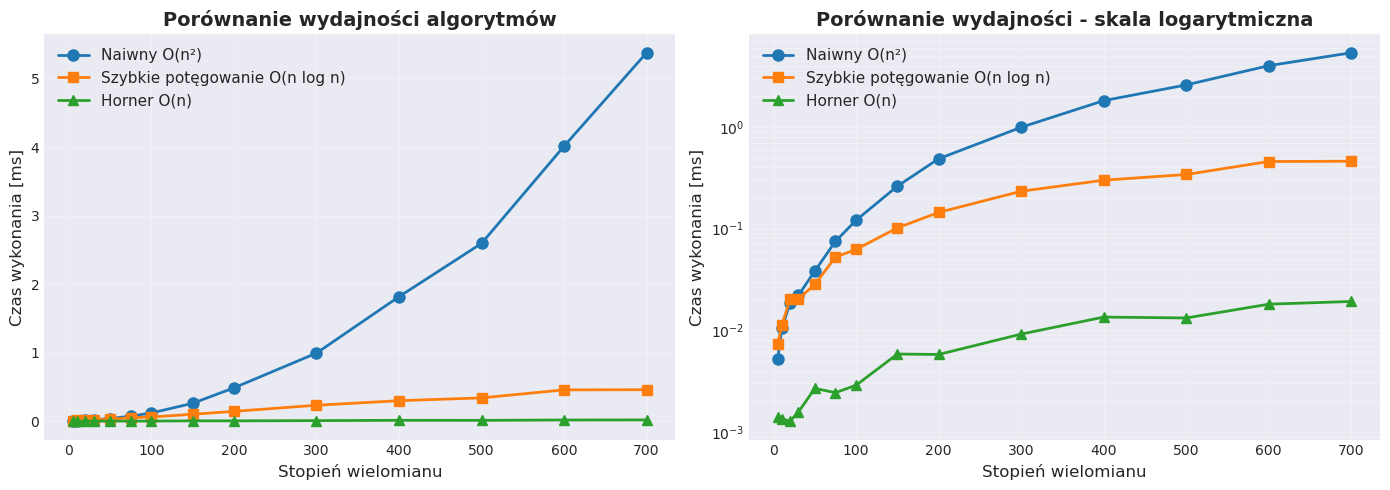

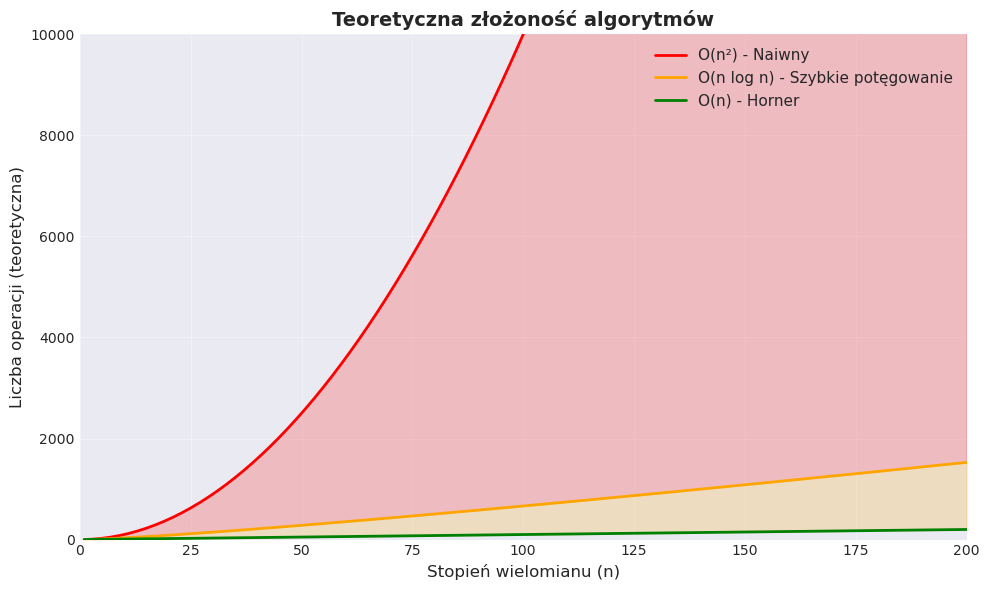

In [7]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Wykres 1: Porównanie wszystkich algorytmów
ax1.plot(degrees, t_naive, 'o-', label='Naiwny O(n²)', linewidth=2, markersize=8)
ax1.plot(degrees, t_fast, 's-', label='Szybkie potęgowanie O(n log n)', linewidth=2, markersize=7)
ax1.plot(degrees, t_horner, '^-', label='Horner O(n)', linewidth=2, markersize=7)

ax1.set_xlabel('Stopień wielomianu', fontsize=12)
ax1.set_ylabel('Czas wykonania [ms]', fontsize=12)
ax1.set_title('Porównanie wydajności algorytmów', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Wykres 2: Wykres w skali logarytmicznej
ax2.semilogy(degrees, t_naive, 'o-', label='Naiwny O(n²)', linewidth=2, markersize=8)
ax2.semilogy(degrees, t_fast, 's-', label='Szybkie potęgowanie O(n log n)', linewidth=2, markersize=7)
ax2.semilogy(degrees, t_horner, '^-', label='Horner O(n)', linewidth=2, markersize=7)

ax2.set_xlabel('Stopień wielomianu', fontsize=12)
ax2.set_ylabel('Czas wykonania [ms]', fontsize=12)
ax2.set_title('Porównanie wydajności - skala logarytmiczna', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3, which="both")

plt.tight_layout()
plt.show()

# Teoretyczne złożoności
n_values = np.arange(1, 201)
naive_complexity = n_values**2
fast_complexity = n_values * np.log2(n_values)
horner_complexity = n_values

plt.figure(figsize=(10, 6))

plt.plot(n_values, naive_complexity, label='O(n²) - Naiwny', linewidth=2, color='red')
plt.plot(n_values, fast_complexity, label='O(n log n) - Szybkie potęgowanie', linewidth=2, color='orange')
plt.plot(n_values, horner_complexity, label='O(n) - Horner', linewidth=2, color='green')

plt.xlabel('Stopień wielomianu (n)', fontsize=12)
plt.ylabel('Liczba operacji (teoretyczna)', fontsize=12)
plt.title('Teoretyczna złożoność algorytmów', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.fill_between(n_values, naive_complexity, fast_complexity, alpha=0.2, color='red',
                 label='Zysk Fast Power')
plt.fill_between(n_values, fast_complexity, horner_complexity, alpha=0.2, color='orange',
                 label='Zysk Horner')

plt.xlim(0, 200)
plt.ylim(0, 10000)  # Ograniczenie osi Y dla lepszej widoczności

plt.tight_layout()
plt.show()

# Zadanie 2 - Analiza eksperymentalna

## Przeprowadźmy analizę eksperymentalną poniższych funkcji:

In [8]:
# Definicje funkcji z zadania.
def example1(S):
    """Return the sum of the elements in sequence S."""
    n = len(S)
    total = 0
    for j in range(n):
        total += S[j]
    return total

def example2(S):
    """Return the sum of the elements with even index in sequence S."""
    n = len(S)
    total = 0
    for j in range(0, n, 2):
        total += S[j]
    return total

def example3(S):
    """Return the sum of the prefix sums of sequence S."""
    n = len(S)
    total = 0
    for j in range(n):
        for k in range(1 + j):
            total += S[k]
    return total

def example4(A, B):  # assume that A and B have equal length
    """Return the number of elements in B equal to the sum of prefix sums in A."""
    n = len(A)
    count = 0
    for i in range(n):
        total = 0
        for j in range(n):
            for k in range(1 + j):
                total += A[k]
        if B[i] == total:
            count += 1
    return count

## Zdefiniujmy funkcje pomocniczą do mierzenia czasu:

In [9]:
# Funkcja pomocniacza do pomiaru czasu
def time_function(func, args_tuple, repeats=3):
    """Uruchamia funkcję repeats razy i zwraca średni czas w milisekundach."""
    times = []
    for _ in range(repeats):
        t0 = time.perf_counter()
        func(*args_tuple)
        t1 = time.perf_counter()
        times.append((t1 - t0) * 1000.0)  # ms
    return float(np.mean(times))

## Po analizie kodu można wysnuć poniższe wnioski co do oczekiwanej złożoności algorytmicznej funkcji:

<div style="background-color: #f0f7ff; border-left: 4px solid #2563eb; padding: 15px; margin: 20px 0;">
<h3 style="margin-top: 0; color: #1e40af;">Example 1</h3>
<p><strong>Oczekiwana złożoność czasowa:</strong> $\mathcal{O}(n)$, bo jedna pętla iterowana co jeden.</p>

<h3 style="margin-top: 0; color: #1e40af;">Example 2</h3>
<p><strong>Oczekiwana złożoność czasowa:</strong> $\mathcal{O}(n^2)$, bo pętla iterowana co dwa.</p>

<div style="display:flex;gap:1px;">
    <h3 style="margin:0;color:#d10e00;">Notka:</h3>
    <p style="margin:20;font-weight:700;">Example 2 powinien się wykonać ok. 2 razy szybciej od Example 1 ze względu na dwa razy mniejszą liczbę iteracji i operacji.</p>
</div>


<h3 style="margin-top: 0; color: #1e40af;">Example 3</h3>
<p><strong>Oczekiwana złożoność czasowa:</strong> $\mathcal{O}(n^2)$, bo pętla zagnieżdżona w pętli</p>

<h3 style="margin-top: 0; color: #1e40af;">Example 3</h3>
<p><strong>Oczekiwana złożoność czasowa:</strong> $\mathcal{O}(n^3)$, bo dwie pętle zagnieżdżone w pętli</p>
</div>

## Zmierzmy czas wykonania funkcji, z rozmiarami wejść dobranymi na podstawie naszej oczekiwanej złożoności algorytmicznej:

In [10]:
# Rozmiary wejść dobrane wg oczekiwanej złożoności:
sizes_lin = [400, 800, 1600, 3200, 6400]                  # Example 1, 2
sizes_quad = [100, 200, 400, 800, 1600, 3200]             # Exampe 2
sizes_cubic = [20, 40, 80, 120, 160, 320]                 # Example 4

results = []

# Pomiary dla liniówek
for n in sizes_lin:
    S = [random.randint(0, 10) for _ in range(n)]
    r1_mean = time_function(example1, (S,), repeats=100)
    r2_mean = time_function(example2, (S,), repeats=100)
    results.append({'func': 'example1', 'n': n, 'time_ms': r1_mean})
    results.append({'func': 'example2', 'n': n, 'time_ms': r2_mean})

# Pomiary dla kwadratówek
for n in sizes_quad:
    S = [random.randint(0, 10) for _ in range(n)]
    r3_mean = time_function(example3, (S,), repeats=75)
    results.append({'func': 'example3', 'n': n, 'time_ms': r3_mean})

# Pomiary dla sześcianówek(??)
for n in sizes_cubic:
    A = [random.randint(0, 5) for _ in range(n)]
    B = [random.randint(0, 1000) for _ in range(n)]
    # ostrożnie: to może robić dużo pracy, użyjemy mniejszych powtórzeń
    r4_mean = time_function(example4, (A, B), repeats=1)
    results.append({'func': 'example4', 'n': n, 'time_ms': r4_mean})

## Zestawienie wyników:

In [11]:
df = pd.DataFrame(results)
df = df[['func','n','time_ms']].sort_values(by=['func','n']).reset_index(drop=True)
print("Tabela wyników (średnie czasy w ms): \n")
print(df.to_string(index=False))

Tabela wyników (średnie czasy w ms): 

    func    n    time_ms
example1  400   0.015139
example1  800   0.030633
example1 1600   0.080008
example1 3200   0.140079
example1 6400   0.247997
example2  400   0.007223
example2  800   0.014667
example2 1600   0.032290
example2 3200   0.063466
example2 6400   0.127661
example3  100   0.149044
example3  200   0.591678
example3  400   2.701590
example3  800  10.666368
example3 1600  43.078628
example3 3200 175.006504
example4   20   0.111297
example4   40   0.839883
example4   80   6.469174
example4  120  24.193840
example4  160  57.079501
example4  320 401.671305


## Wykresy:

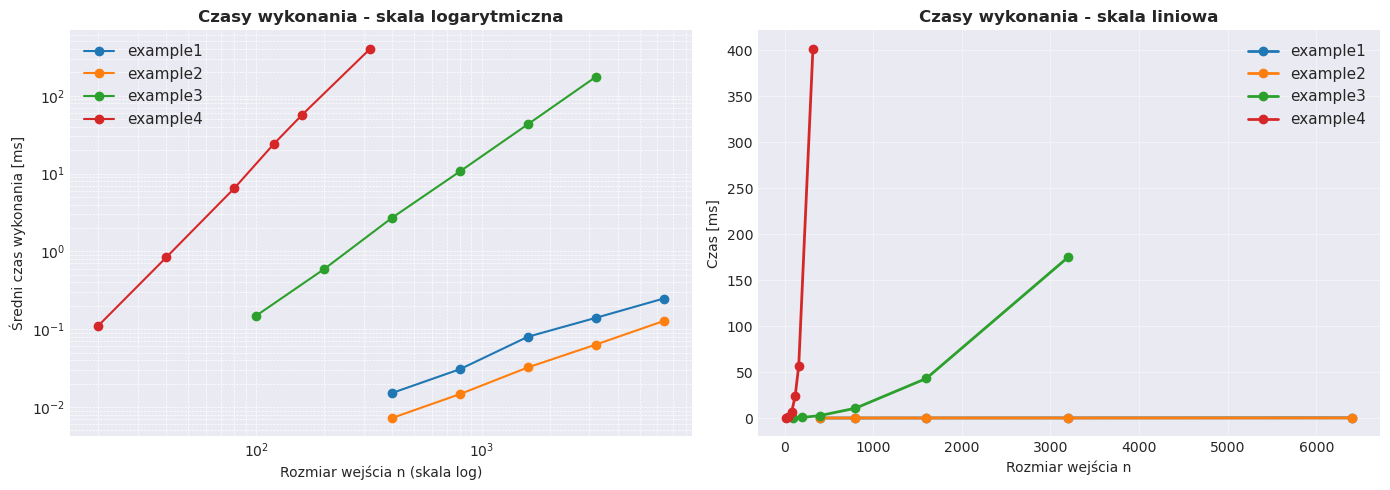

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# Wykres 1: skala logarytmiczna
for func_name, group in df.groupby('func'):
    ax1.plot(group['n'], group['time_ms'], marker='o', label=f"{func_name}")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Rozmiar wejścia n (skala log)')
ax1.set_ylabel('Średni czas wykonania [ms]')
ax1.set_title('Czasy wykonania - skala logarytmiczna', fontweight="bold")
ax1.legend(fontsize=11)
ax1.grid(True, which="both", ls="--", linewidth=0.5)

for func_name, group in df.groupby('func'):
    n = group['n'].values
    t = group['time_ms'].values
    ax2.plot(n, t, marker='o', linestyle='-', label=f"{func_name}", linewidth=2)
    
ax2.set_xlabel('Rozmiar wejścia n')
ax2.set_ylabel('Czas [ms]')
ax2.set_title('Czasy wykonania - skala liniowa', fontweight="bold")
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.4, which="both")

plt.tight_layout()
plt.show()

# Zadanie 3 - Czy wbudowana funkcja sorted ma złożoność $ n \log{(n)} $?

## Wpierw zbadajmy średni czas wywołania funkcji *sorted()* dla różnych wymiarów tablic.

In [13]:
def measure_sorted_time(n, repeats=5):
    """
    Mierzy średni czas wykonania funkcji sorted() dla listy o rozmiarze n.
    """
    times = []
    
    for _ in range(repeats):
        # Generujemy losową listę
        data = np.random.randint(0, 100000, n).tolist()
        
        # Mierzymy czas sortowania
        start = time.perf_counter()
        sorted(data)
        end = time.perf_counter()
        
        times.append(end - start)
    
    return np.mean(times)

In [14]:
sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 30000, 50000, 75000, 100000, 125000, 150000, 175000, 200000]
times = []

for n in sizes:
    avg_time = measure_sorted_time(n, repeats=100)
    times.append(avg_time)
    nlogn = n * np.log(n)
    print(f"{n:<15} {avg_time:<15.6f} {nlogn:<15.2f}")

    
times = np.array(times)
sizes = np.array(sizes)

100             0.000010        460.52         
500             0.000057        3107.30        
1000            0.000092        6907.76        
2000            0.000178        15201.80       
5000            0.000482        42585.97       
10000           0.001061        92103.40       
20000           0.002109        198069.75      
30000           0.003379        309268.58      
50000           0.007933        540988.91      
75000           0.012614        841893.25      
100000          0.018322        1151292.55     
125000          0.024991        1467008.63     
150000          0.032647        1787758.59     
175000          0.032863        2112694.72     
200000          0.038377        2441214.53     


## Jeżeli *sorted()* ma złożoność $\mathcal{O}(n \log n)$, to czas wykonania można opisać funkcją: $ T(n) = a \cdot n \log{(n)} + b $. 

In [15]:
def theoretical_nlogn(n, a, b):
    """
    Funkcja teoretyczna O(n log n) w postaci: a * n * log(n) + b
    """
    return a * n * np.log(n) + b

In [16]:
from scipy.optimize import curve_fit

params, covariance = curve_fit(theoretical_nlogn, sizes, times)
a, b = params

print(f"Dopasowane parametry funkcji a*n*log(n) + b:")
print(f"a = {a:.10f}")
print(f"b = {b:.10f}")

Dopasowane parametry funkcji a*n*log(n) + b:
a = 0.0000000165
b = -0.0004032132


## Teraz wygenerujmy wykres z funkcją dopsowaną do naszych punktów pomiarowych:


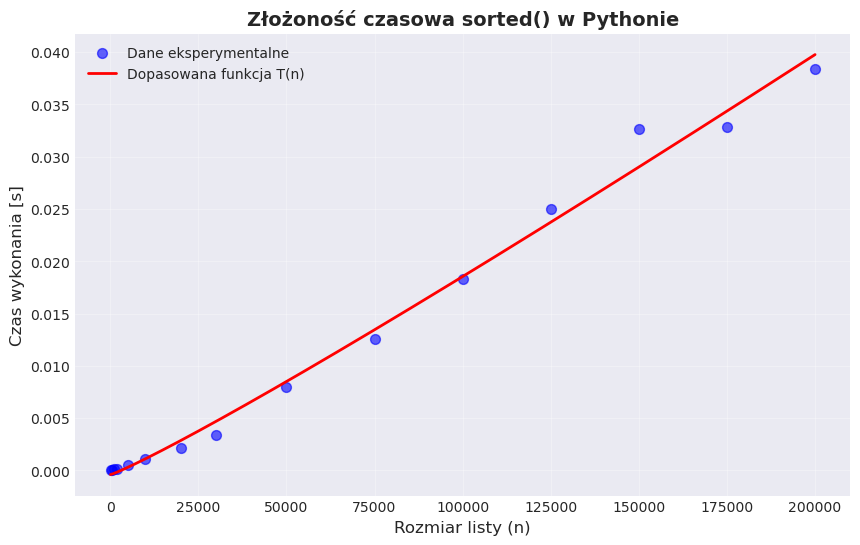

In [17]:
# Tworzenie wykresu
plt.figure(figsize=(10, 6))
    
# Wykres: Czas wykonania vs rozmiar
plt.scatter(sizes, times, color='blue', s=50, alpha=0.6, label='Dane eksperymentalne')
    
# Dopasowana krzywa
sizes_smooth = np.linspace(sizes.min(), sizes.max(), 1000)
times_fitted = theoretical_nlogn(sizes_smooth, a, b)
plt.plot(sizes_smooth, times_fitted, 'r-', linewidth=2, 
label='Dopasowana funkcja T(n)')
    
plt.xlabel('Rozmiar listy (n)', fontsize=12)
plt.ylabel('Czas wykonania [s]', fontsize=12)
plt.title('Złożoność czasowa sorted() w Pythonie', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

In [18]:
# R^2
residuals = times - theoretical_nlogn(sizes, a, b)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((times - np.mean(times))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R² = {r_squared:.6f}")
    

R² = 0.991742


Jak widać istnieje taka funkcja w postaci: $ T(n) = a \cdot n\log{(n)}$, którą można dopasować do naszych pomiarów, zachowująć przy tym mały błąd kwadratowy. Czyli odpowiedź na pytanie z zadaniu, to **TAK**, funkcja *sorted()* ma złożoność czasową: $ n \log{(n)} $.